In [28]:
import pandas as pd
import seaborn as sns

In [3]:
# Монтируем Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
# Читаем файл с указанием кодировки
path = '/content/drive/My Drive/2Продвинутый pandas и знакомство с визуализацией на Python/3_user_data.csv'
user_data = pd.read_csv(
    path
)

user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [6]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [8]:
# Читаем файл с указанием кодировки
path = '/content/drive/My Drive/2Продвинутый pandas и знакомство с визуализацией на Python/3_logs.csv'
logs = pd.read_csv(
    path
)

logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [9]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [11]:
logs.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

In [12]:
success_counts = logs.loc[logs.success == True].client.value_counts()

In [14]:
max_num = success_counts.max()

In [15]:
max_success_users = success_counts.loc[success_counts == max_num]

In [16]:
max_success_users

,count
client,
61473,41
78349,41
36165,41
61468,41
92584,41
28719,41
82563,41
52870,41
12179,41


In [17]:
max_success_users.index.sort_values()

Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64', name='client')

In [18]:
logs.loc[logs.success==True].platform.value_counts().idxmax()

'phone'

In [25]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [26]:
premium_logs = logs.merge(user_data, on='client')
premium_logs

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,35604,False,phone,1585459894,True,65
2,10931,True,computer,1585468629,False,28
3,41928,True,phone,1585446772,False,46
4,48925,True,phone,1585467880,False,33
...,...,...,...,...,...,...
3434,92584,True,computer,1585408896,False,28
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [27]:
premium_logs.loc[premium_logs.premium==True].platform.value_counts().idxmax()

'phone'

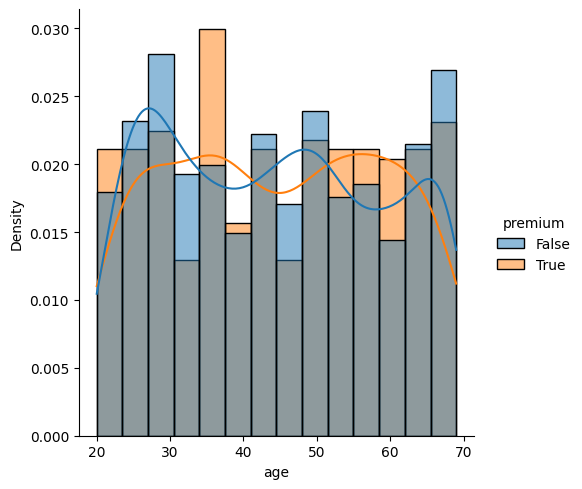

In [29]:
sns.displot(data=premium_logs, x='age', hue = 'premium', kde = True, kind = 'hist', stat = 'density',
            common_norm = False, bins = 14)

In [30]:
success_counts = logs.loc[logs.success==True].client.value_counts()

In [31]:
success_counts

,count
client,
61473,41
78349,41
36165,41
61468,41
92584,41
...,...
50300,1
51575,1
3553,1


In [32]:
success_counts= success_counts.rename('successes')

<Axes: xlabel='successes', ylabel='count'>

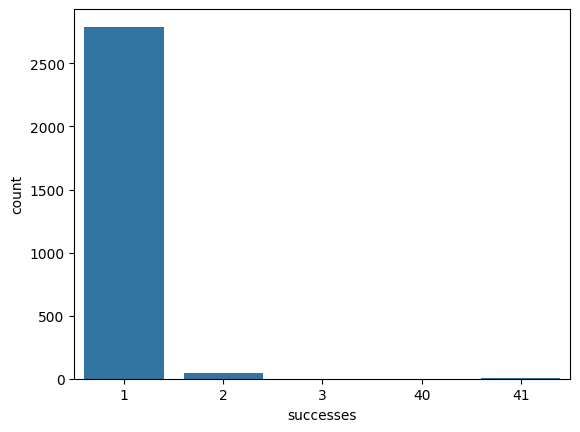

In [33]:
sns.countplot(x=success_counts)

In [34]:
import matplotlib.pyplot as plt


In [36]:
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='age', ylabel='count'>

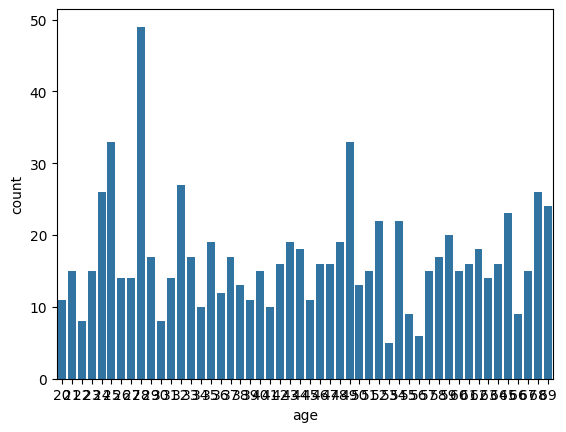

In [37]:
sns.countplot(data = premium_logs.loc[(premium_logs.platform == 'computer')
& (premium_logs.success==True)],
              x = 'age')